# Exercise

In the csv file you will find a list of 277 positions extracted from a managed portfolio. For each position, the annual performance recorded up to the cutoff date is reported. 

It is required to analyze the performance distribution by identifying the number of clusters present with the kmeans method and discuss the following results:

 - Exploratory data analysis 
 - Initial choice of a number of clusters and their identification using the kmeans method 
 - Graphic representation of the distributions obtained with indication of the centroids 
 - Extraction of the performance values of the individual clusters and analysis of the frequency distribution (histogram) 
 - Analysis of the choice of the number of clusters using the elbow and silhouette method

# Solution

In [13]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 

Load data into a pandas dataframe

In [14]:
path = './data'

In [15]:
data = pd.read_csv(path + '/assignment.csv', sep = ';') 

In [16]:
data.head()

,dossier,performance
0,1,2.88099
1,2,2.85309
2,3,2.96310
3,4,2.88473
4,5,2.86781


Make a simple exploratory analysis ...

In [17]:
n = len(data['dossier'])
X = np.empty([n, 2])

X[:, 0] = data['dossier']
X[:, 1] = data['performance']

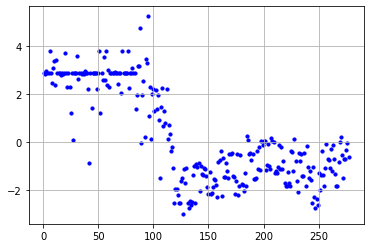

In [18]:
plt.scatter(X[ : , 0], X[ :, 1], s = 10, c = 'b')
plt.grid()
plt.show()

Choose the number of cluster

In [8]:
nCluster = 2

In [9]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters = nCluster)
Kmean.fit(X)

KMeans(n_clusters=2)

In [10]:
Kmean.cluster_centers_

array([[ 69.5       ,   1.74587101],
       [208.        ,  -1.08354748]])

In [11]:
XC = np.empty(nCluster)
YC = np.empty(nCluster)

for k in range(nCluster):
    XC[k] =Kmean.cluster_centers_[k][0]
    YC[k] =Kmean.cluster_centers_[k][1]

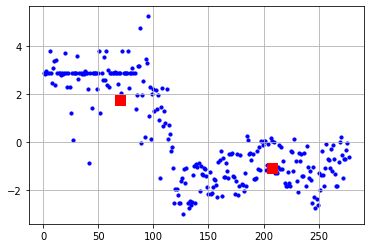

In [12]:
plt.scatter(X[ : , 0], X[ : , 1], s =10, c='b')
for k in range(nCluster):
    plt.scatter(XC[k], YC[k], s=100, c='r', marker='s')

plt.grid()
plt.show()

Now extract the different cluster and plot the frequency distribution

In [46]:
cluster_map = pd.DataFrame()
cluster_map['performance'] = X[:,1]
cluster_map['cluster'] = Kmean.labels_

In [47]:
y1 = cluster_map[cluster_map.cluster == 0]['performance']
y1.shape

(139,)

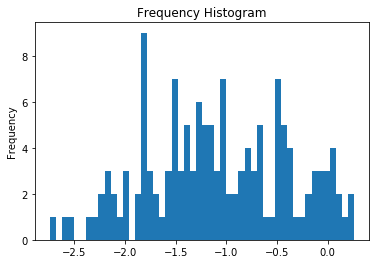

In [48]:
plt.hist(y1, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [49]:
y2 = cluster_map[cluster_map.cluster == 1]['performance']
y2.shape

(138,)

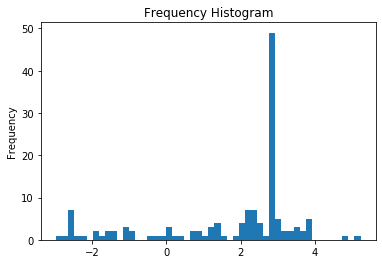

In [50]:
plt.hist(y2, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

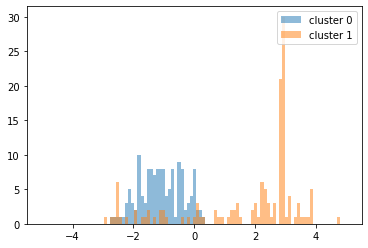

In [51]:
bins = np.linspace(-5, 5, 100)

plt.hist(y1, bins, alpha=0.5, label='cluster 0')
plt.hist(y2, bins, alpha=0.5, label='cluster 1')
plt.legend(loc='upper right')
plt.show()

## Determining the number of clusters

### The Elbow Method

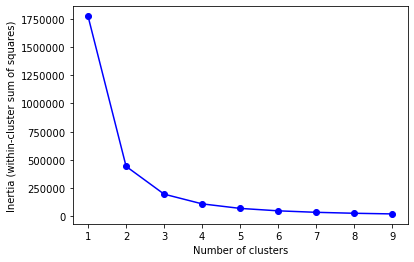

In [33]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### The Silhouette Analysis

In [34]:
# Kmeans algorithm from scikit-learn
from sklearn.metrics import silhouette_samples, silhouette_score

In [20]:
# Silhouette Analysis
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette       = []
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    silhouette.append(silhouette_avg)

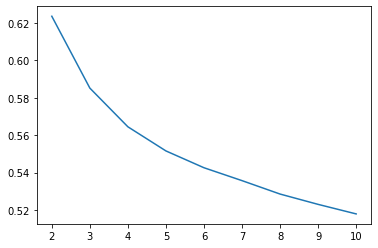

In [21]:
plt.plot(range_n_clusters, silhouette)